# Honour Killings in Punjab (District wise)

In [ ]:
### This is the comparision of districts of Punjab on the base of Honor Killings reported from year 2011 to 2019. 

### An honor or a shame killing, is the murder of a member of a family, 
### due to the perpetrators' belief that the victim has brought shame or dishonor upon the family, 
### or has violated the principles of a community or a religion with an honor culture. 
### Typical reasons include divorcing or separating from their spouse, refusing to enter an arranged, 
### child or forced marriage, being in a relationship or having associations with social groups outside 
### the family that is strongly disapproved by one's family, having premarital or extramarital sex,
### becoming the victim of rape or sexual assault, dressing in clothing, jewelry and accessories which 
###care deemed inappropriate, and engaging in non-heterosexual relations.

### This practice, unfortunately, is observed the most in the Sub-continent( Pakistan, India, Bangladesh).

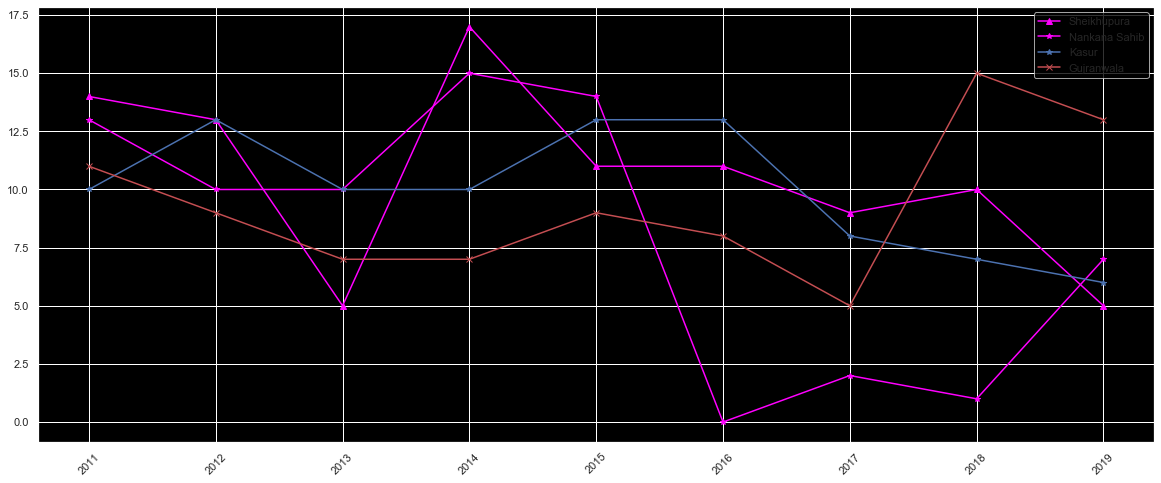

In [102]:
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
import random

# This is the main data we will be using througout the project
main_data = pd.read_csv(r'S:\Datasets\Punjab\honour_killings.csv')

#Trimming the data to the specific columns, includeing the years from 0 to 10.
data = main_data.iloc[:, :10]
data.set_index('Districts',inplace=True)
data = data.transpose()

# Plotting some random districts on a single canvas
def all_in_one(dist, col,mark):
        plt.plot(data[dist], color=col, data=data,marker=mark)
       
    
# Setting up the labels and markers
dists = data.columns.to_list()
needed = dists[1:5]
markers = ['^', '*', 'x', 'o', 'D','^']
colors = ['b', 'r', 'y', 'c','g', 'magenta']

plt.figure(figsize=(20,8))
for c,i in enumerate(needed):
    index = random.randint(0,5)
    index2 = random.randint(0,5)
    all_in_one(i,colors[index],markers[index2])
    
yrs = [2011,2012,2013,2014,2015,2016,2017,2018,2019]
plt.xticks([0,1,2,3,4,5,6,7,8], yrs, rotation=45)
plt.legend(loc='upper right')
plt.show()

del data
del needed

# Most and Least ranking Districts (BarPlot)

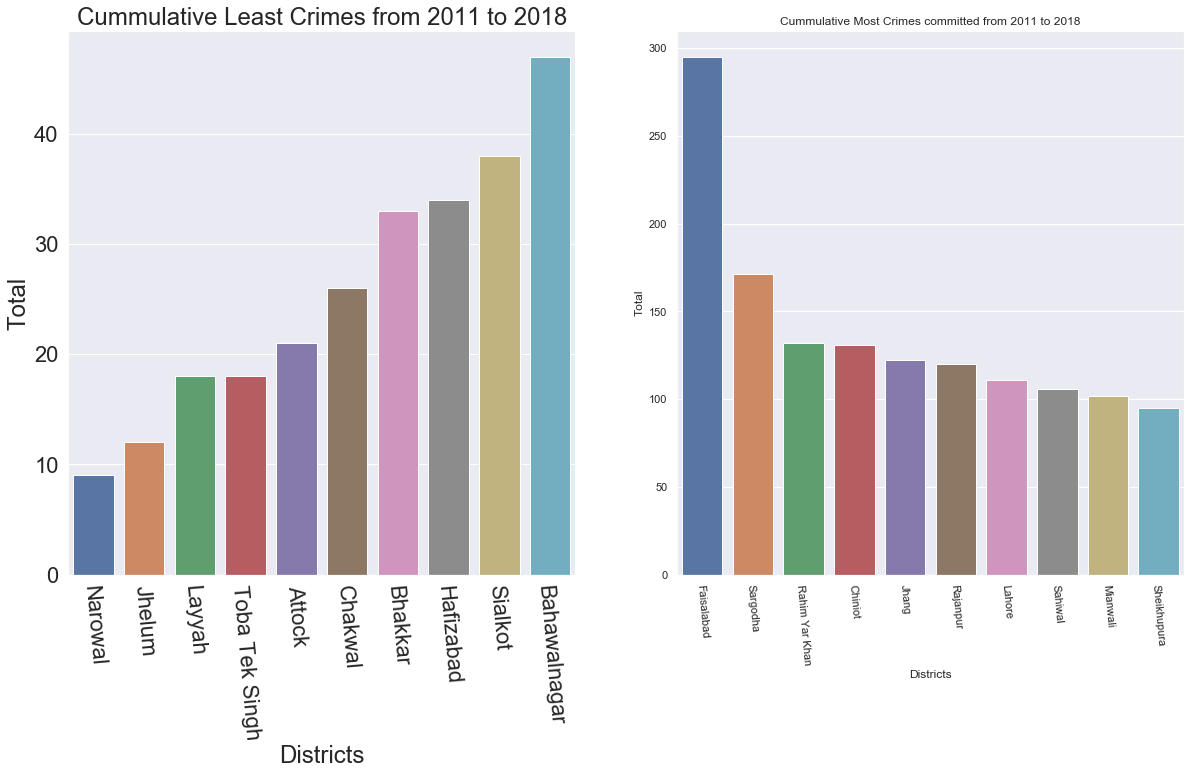

In [103]:
import seaborn as sns

# data = pd.read_csv(r'S:\Datasets\Punjab\honor_killings.csv')
# data.set_index('Districts',inplace=True)
# data = data.transpose()

# Setting up the formats like x-axis labels, fore and background colors etc.
def formatting():
    sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
    plt.xticks(rotation=-85)
    fig, axis2 = plt.subplots()

data = main_data.iloc[:,:10]
data['Total']=data.sum(axis=1)


# Checking for the districts with highest number of crimes

nw = pd.DataFrame()
nw=data.sort_values('Total',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,10)})

axis1 = plt.subplot(122)
sns.barplot(nw.Districts, nw.Total).set_title('Cummulative Most Crimes committed from 2011 to 2018')
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
sns. set(font_scale=2)
plt.xticks(rotation=-85)
 
    
# Checking for the districts with least crimes
nw2 = data.sort_values('Total', ascending=True).head(10)

axis2 = plt.subplot(121)
sns.barplot(nw2.Districts, nw2.Total).set_title('Cummulative Least Crimes from 2011 to 2018')

sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
plt.xticks(rotation=-85)

plt.show()
del data

# Representation on SqarePlot to better see the exact Numbers

In [104]:
import plotly.graph_objects as go

# taking the sum of numbers from year 2011 to 2019
data = main_data.iloc[:,:10]
data['Total']=data.sum(axis=1)
data['Labels'] = data[['Districts','Total']].apply(lambda x : '{} {}'.format(x[0],x[1]), axis=1)
# Adding an attribute claled Parents to tuck in the frames
data['Parents'] = 'Punjab'

fig = go.Figure(go.Treemap(
    labels = data['Labels'],
    parents = data['Parents'],
    values = data['Total'],
    marker_colorscale = 'Rainbow'#[[0,'rgb(255, 255, 255)'],[1,'rgb(200, 0, 2)']]
))

fig.show()
# data.head()
del data

# Total No. of Honour Killings from 2011 to 2019--Districtwise

In [106]:

data= main_data
data = data.transpose().reset_index().rename(columns={'index':'Year'})

data = data.drop([0])
data = data[~data.Year.str.contains("Population")]

data["Total"] = data.iloc[:,1:34].astype(int).sum(axis=1)
df2 = data[["Year", "Total"]]

# df2.head()
# data.to_csv(r'F:\data.csv',index=False)

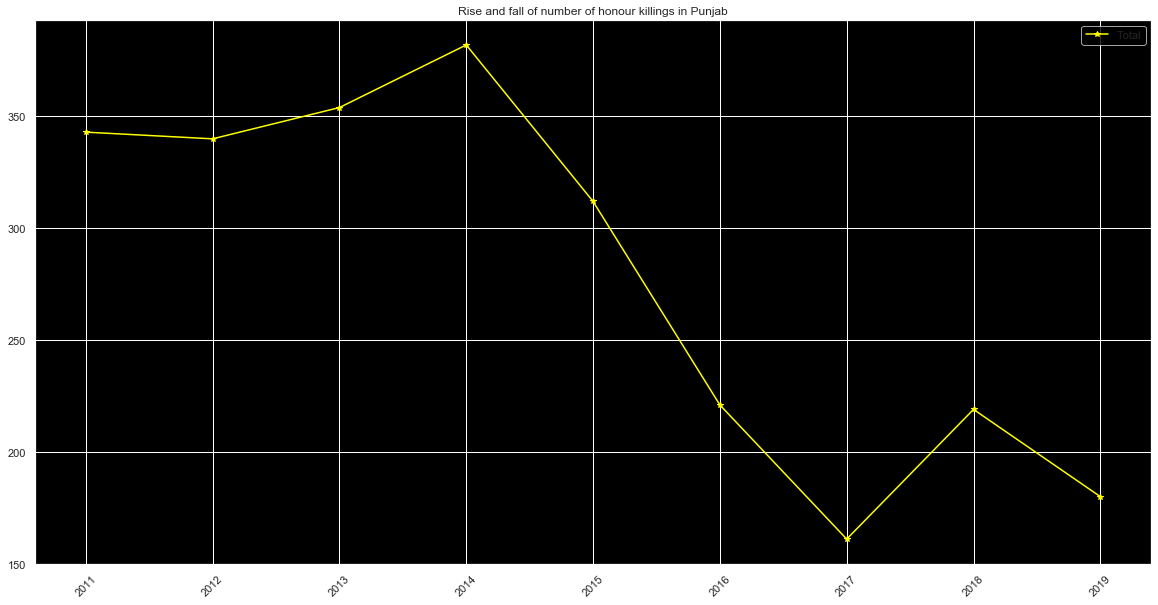

<Figure size 1440x720 with 0 Axes>

In [107]:
# data = pd.read_csv(r'S:\Datasets\Punjab\honor_killings_commulative.csv')
# data.head()

plt.plot(data['Total'], color = 'yellow', data = data['Year'], marker='*')
yrs = [2011,2012,2013,2014,2015,2016,2017,2018,2019]
plt.xticks([1,2,3,4,5,6,7,8,9], yrs, rotation=45)
plt.title('Rise and fall of number of honour killings in Punjab')
plt.legend(loc='upper right')
# plt.rcParams['axes.facecolor'] = 'black'
fig = plt.figure()
fig.patch.set_facecolor('blue')
plt.show()
# new = pd.DataFrame()
# new['Total'] = data.sum(axis=0)

## Population Vs Honor Killings

In [108]:
import pandas as pd
df = pd.read_csv(r'S:\Datasets\Punjab\honour_killings.csv')
df['Total']=df.iloc[0:, 0:10].sum(axis=1)

# Calculating number of honor killings Vs total population
df2 = df[["Districts","Population","Total"]]
df2['ks'] = df2.Population.div(100000)
df2['Per lac'] = df2.Total.div(df2.ks, axis=0)

df2=df2.sort_values('Per lac',ascending=False)
df2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Districts,Population,Total,ks,Per lac
20,Chiniot,1369740,131,13.69740,9.563859
15,Mianwali,1546094,102,15.46094,6.597270
29,Rajanpur,1995958,120,19.95958,6.012151
2,Nankana Sahib,1356374,72,13.56374,5.308270
7,Mandi Bahauddin,1593292,81,15.93292,5.083814


# Choropleth Map

In [109]:
import folium
import json
import plotly.express as px
import numpy as np

# Here we need the geojson file to match with our data and plot on the map
json_file = json.load(open('S:\Datasets\District Boundries of Pakistan- GeoJson\pakistan_districts.geojson'))
# print(json_file['features'][7]['properties'])

data = main_data.iloc[:,:10]

# Taking a total of the crimes from 2011 to 2019
data['Total']=data.sum(axis=1)
data.head()

# Mapping the geojson file with our dataset for plotting purposes
# Here it is mandatory that you need something to relate one data with the other
# I am using the 'objectid' feature in geojson file then mapping it with the honour_killings.csv dataset
# on the base of Names. If you have difference in names, that might raise a problem. You may correct that and
# good to go.


id_map = {}
for feature in json_file['features']:
    feature['id'] = feature['properties']['objectid']
    id_map[feature['properties']['districts']] = feature['id']
           
# data = main_data

data['id'] = data['Districts'].apply(lambda x: id_map[x])
# data.head()
# The log10 is used overcome the wide range of data i.e. some have 1,2 crimes while others have 295
data['pop_scale'] = np.log10(data['Total'])
# data.head()

In [110]:
# Passing the data we have prepared so far to the choropleth map

fig = px.choropleth(data, 
                    locations = 'id', 
                    geojson = json_file, 
                    color="Total", 
                    hover_name = 'Districts',
                    hover_data = ["Total"], 
                    scope = 'asia',
                    color_continuous_scale = ["Yellow","Red"],#px.colors.diverging.BrBG 
                    color_continuous_midpoint = 150
                   )
fig.update_geos(fitbounds='locations', visible=True)
fig.show()

# Choropleth of Honour Killings Per Lac people

    This is a new dimension which shows that most honor killings has been committed in Chiniot district for every One Lac population. Although, the number of killings is highest in Faisalabad but taking population into consideration, Chiniot appears to be the highest; having more than 9 honor killings for every 100000 people.

In [53]:
data['ks'] = df2.Population.div(100000)
data['Per_lac'] = data.Total.div(data.ks, axis=0)
# data.head()
fig = px.choropleth(data, 
                    locations = 'id', 
                    geojson = json_file, 
                    color="Per_lac", 
                    hover_name = 'Districts',
                    hover_data = ["Total"], 
                    scope = 'asia',
                    color_continuous_scale = ["Yellow","Red"],#px.colors.diverging.BrBG 
#                     color_continuous_midpoint = 0
                   )
fig.update_geos(fitbounds='locations', visible=True)
fig.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

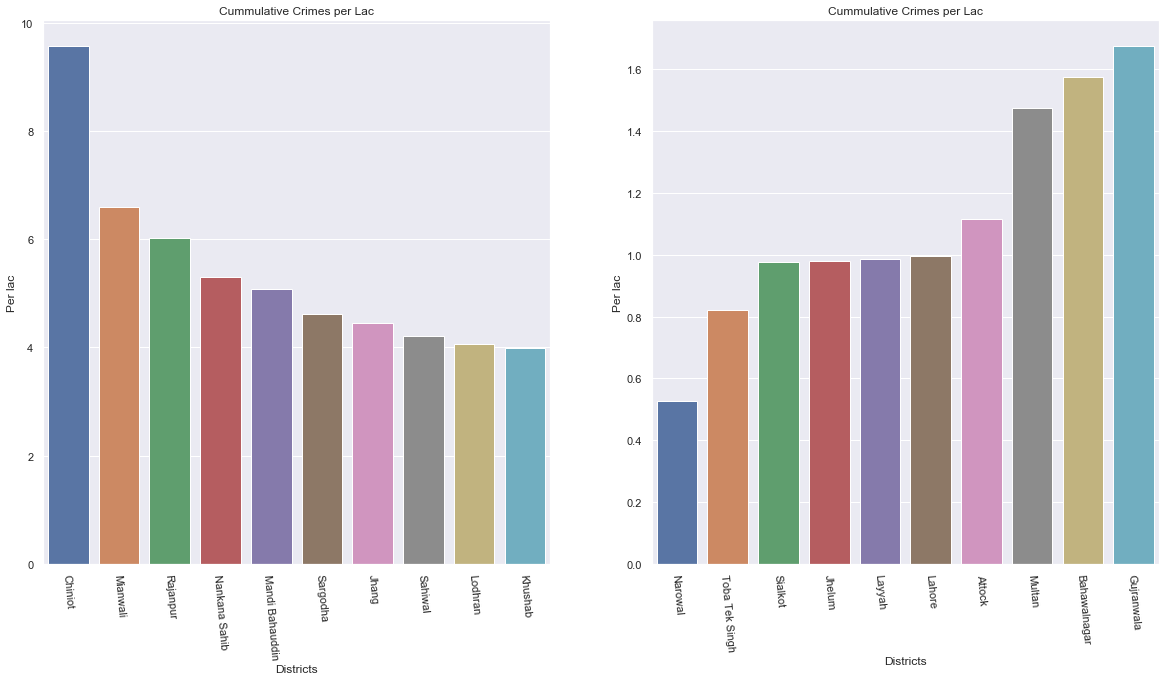

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

nw = pd.DataFrame()
nw=df2.sort_values('Per lac',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,10)})


axis1 = plt.subplot(121)
sns.barplot(nw.Districts, nw['Per lac']).set_title('Cummulative Crimes per Lac')
# sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
# sns. set(font_scale=2)
plt.xticks(rotation=-85)

nw = df2.sort_values('Per lac', ascending=True).head(10)

axis1 = plt.subplot(122)
sns.barplot(nw.Districts, nw['Per lac']).set_title('Cummulative Crimes per Lac')
# sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
# sns. set(font_scale=2)
plt.xticks(rotation=-85)

# Sources

Data used in this project is gathered from two sources.
1. https://punjabpolice.gov.pk/honour-killings
2. https://en.wikipedia.org/wiki/Punjab,_Pakistan
3. https://www.kaggle.com/edrisedris/pakistan-districts-geojson-file
The data of total crimes reported in the province of Punjab(Pakistan) district-wise can be found at the link 1. This data set contains the data of 36 districts spanning the period from 2011 to 2019. 

The second data set of population of these disctricts has been gathered from wikipedia page (which is probably taken from the census data 2017). This data is included to see crimes being committed per lac population. 

The third dataset can be found on my kaggle account. It is the geojson file of to represent districts of Pakistan.
You can I also find the data used here, in my github repository and kaggle.
https://github.com/idreesgithub/Honour_Killings_in_Punjab_Pakistan
